In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('Concrete_Data_Yeh.csv')
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X[:5]

array([[ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. ,  162. ,    2.5, 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  270. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  365. ],
       [ 198.6,  132.4,    0. ,  192. ,    0. ,  978.4,  825.5,  360. ]])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [5]:
X_train.shape

(824, 8)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def model_():
    model = Sequential()

    model.add(Dense(10,input_shape=(X.shape[1],),activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(6,activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.04), loss='mse', metrics=['mae'])

    model.summary()
    return model

In [7]:
model = model_()
history = model.fit(X_train,y_train,epochs=10, validation_data = (X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 824 samples, validate on 206 samples
Epoch 1/10
824/824 [==============================] - 0s 269us/step - loss: 1217.6996 - mae: 30.5994 - val_loss: 924.1731 - val_mae: 25.5599
Epoch 2/10
824/824 [==============================] - 0s 63us/step 

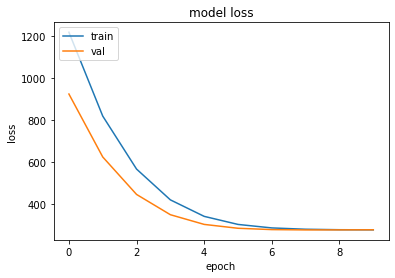

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Underfitting

In [9]:
model = model_()
history = model.fit(X_train[:100],y_train[:100],epochs=3, validation_data = (X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 206 samples
Epoch 1/3
100/100 [==============================] - 0s 2ms/step - loss: 1491.4184 - mae: 35.0678 - val_loss: 1289.7698 - val_mae: 31.7996
Epoch 2/3
100/100 [==============================] - 0s 240us/step - 

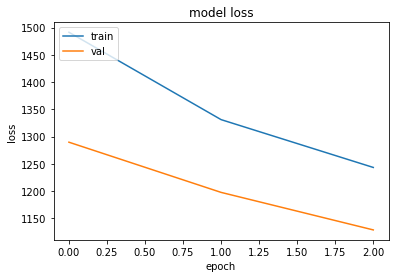

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 # Overfitting 

In [11]:
model = model_()
history = model.fit(X_train[:10],y_train[:10],epochs=500, validation_data = (X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples, validate on 206 samples
Epoch 1/500
10/10 [==============================] - 0s 18ms/step - loss: 1615.9844 - mae: 37.7912 - val_loss: 1406.6663 - val_mae: 33.5825
Epoch 2/500
10/10 [==============================] - 0s 798us/step - 

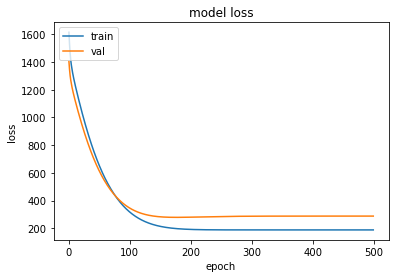

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()